In [1]:
import time
import calendar
import datetime

In [2]:
time.time()

1597193065.67867

In [4]:
print(calendar.calendar(2020))

                                  2020

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                      1  2                         1
 6  7  8  9 10 11 12       3  4  5  6  7  8  9       2  3  4  5  6  7  8
13 14 15 16 17 18 19      10 11 12 13 14 15 16       9 10 11 12 13 14 15
20 21 22 23 24 25 26      17 18 19 20 21 22 23      16 17 18 19 20 21 22
27 28 29 30 31            24 25 26 27 28 29         23 24 25 26 27 28 29
                                                    30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                   1  2  3       1  2  3  4  5  6  7
 6  7  8  9 10 11 12       4  5  6  7  8  9 10       8  9 10 11 12 13 14
13 14 15 16 17 18 19      11 12 13 14 15 16 17      15 16 17 18 19 20 21
20 21 22 23 24 25 26      18 19 20 21 22 

In [9]:
import sys as s

In [10]:
datetime.sys is s # datetime에 내제되어 있는 기능

True

In [11]:
datetime.MINYEAR

1

In [12]:
datetime.MAXYEAR

9999

In [14]:
dt = datetime.date(2020,8,12)

In [15]:
datetime.time(23,42)

datetime.time(23, 42)

In [17]:
a = datetime.datetime(year=2020, month=4, day =4)

In [18]:
b = datetime.datetime(year=2020, month=7, day =4)

In [19]:
b-a # 시간의 연산

datetime.timedelta(days=91)

In [20]:
a + datetime.timedelta(50) # 50일 더해줌

datetime.datetime(2020, 5, 24, 0, 0)

In [21]:
a.now() # 내 시스템 기반 시간

datetime.datetime(2020, 8, 12, 10, 7, 30, 525361)

In [22]:
a.utcnow() # 표준 시간

datetime.datetime(2020, 8, 12, 1, 7, 40, 714018)

In [23]:
a.strftime('%Y년 %m-%d')

'2020년 04-04'

In [33]:
a.strptime('2020/3/4','%Y/%d/%m') # 이걸 datetime format형태로 parsing해줘라

datetime.datetime(2020, 4, 3, 0, 0)

In [24]:
a.timestamp()

1585926000.0

In [29]:
x = datetime.datetime(1971,1,1,1,1,1)

In [30]:
x.timestamp()

31507261.0

In [34]:
import dateutil

In [35]:
dateutil.parser.parse('2022/03/04')

datetime.datetime(2022, 3, 4, 0, 0)

In [38]:
dateutil.parser.parse("Today is January 1, 2047 at 8:21:00AM", fuzzy_with_tokens=True)

(datetime.datetime(2047, 1, 1, 8, 21), ('Today is ', ' ', ' ', 'at '))

In [37]:
import pandas as pd

In [43]:
data = pd.read_csv('u.data',sep='\t', header=None, names=['user id','item id','rating','timestamp'])

In [44]:
data # need to change timestamp

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [45]:
data.info() # timestamp = int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [46]:
import tensorflow as tf

In [47]:
import numpy as np

In [48]:
a = tf.constant([1,2], dtype=tf.float32)

In [50]:
pd.to_datetime(data.timestamp, unit='s') # timestamp to datetime

0       1997-12-04 15:55:49
1       1998-04-04 19:22:22
2       1997-11-07 07:18:36
3       1997-11-27 05:02:03
4       1998-02-02 05:33:16
                ...        
99995   1997-11-22 05:10:44
99996   1997-11-17 19:39:03
99997   1997-09-20 22:49:55
99998   1997-12-17 22:52:36
99999   1997-11-19 17:13:03
Name: timestamp, Length: 100000, dtype: datetime64[ns]

In [54]:
time = pd.to_datetime(data.timestamp, unit='s')
type(time[1]) # 하지만 왜 still timestamp?

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
issubclass(pd.Timestamp, datetime.datetime) # 왜냐면 Timestamp가 애초에 datetime 상속받은 애기 때문

True

In [56]:
data.timestamp = time

In [57]:
data.info() # 이제 datetime64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user id    100000 non-null  int64         
 1   item id    100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [58]:
timeseries = data.set_index('timestamp').sort_index()

In [60]:
timeseries['1997-09']

,user id,item id,rating
timestamp,,,
1997-09-20 03:05:10,259,255,4
1997-09-20 03:05:27,259,286,4
1997-09-20 03:05:54,259,298,4
1997-09-20 03:06:21,259,185,4
1997-09-20 03:07:23,259,173,4
...,...,...,...
1997-09-30 23:49:32,543,226,4
1997-09-30 23:52:23,543,403,4
1997-09-30 23:52:23,543,855,4


In [61]:
timeseries['1997-09-20T03':'1997-09-21'] # slicing

,user id,item id,rating
timestamp,,,
1997-09-20 03:05:10,259,255,4
1997-09-20 03:05:27,259,286,4
1997-09-20 03:05:54,259,298,4
1997-09-20 03:06:21,259,185,4
1997-09-20 03:07:23,259,173,4
...,...,...,...
1997-09-21 21:16:39,506,90,2
1997-09-21 21:17:31,506,489,4
1997-09-21 21:17:31,506,54,4


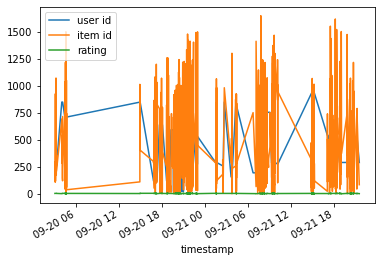

In [62]:
timeseries['1997-09-20T03':'1997-09-21'].plot.line()

In [63]:
timeseries['rating'].resample('1M').mean() # 1M = 월별 1Y = 년별

timestamp
1997-09-30    3.540125
1997-10-31    3.591421
1997-11-30    3.559842
1997-12-31    3.580388
1998-01-31    3.397730
1998-02-28    3.455009
1998-03-31    3.548831
1998-04-30    3.574848
Freq: M, Name: rating, dtype: float64

In [66]:
x = timeseries['rating'].resample('1W')

In [67]:
x.ohlc() # 시작, 최고, 최저, 끝

,open,high,low,close
timestamp,,,,
1997-09-21,4,5,1,2
1997-09-28,3,5,1,2
1997-10-05,3,5,1,4
1997-10-12,2,5,1,4
1997-10-19,5,5,1,5
1997-10-26,4,5,1,4
1997-11-02,4,5,1,3
1997-11-09,3,5,1,5
1997-11-16,4,5,1,4


In [ ]:
 # 시계열 예측 분석에 가장 인기한 패키지: prophet

In [70]:
import folium

In [81]:
m = folium.Map([37.5665,126.9780], zoom_start=13) # 서울 위치, min_zoom으로도 제한 가능, tiles ='Stamen Terrain' -> 지도 모양

In [82]:
m

In [85]:
folium.Marker([37.5665,126.9780], popup = '이곳', tooltip = '저곳').add_to(m) # add_to 해줘야 함 popup: 클릭했을 때/ tooltip: 마우스 갖다 댔을 때

In [86]:
m # 여기선 오류나지만

In [87]:
m.save('temp.html') # 저장해서 보면 잘 작동함. 버그.

In [ ]:
# popup , tooltip 안에 html을 넣을 수 있어서 잘만 하면 저런 거 안에 사진 등 넣을 수 있다.

In [91]:
folium.Circle([37.5665,126.9780], 50, color='red', fill = 'pink').add_to(m) # 절대적 크기

In [92]:
folium.CircleMarker([37.5665,126.9780], 50, color='green').add_to(m) # 상대적 크기

In [93]:
m # 차이점을 볼 수 있다

In [ ]:
plugins.ScrollZoomToggler().add_to(m)

In [96]:
from folium.plugins import MousePosition
m = folium.Map()
MousePosition().add_to(m)
m

In [97]:
############ 이제 folium_plugins.ipynb 파일 참조 ###################################

In [98]:
pprint import pprint

Pretty printing has been turned OFF


In [107]:
import json
import pandas as pd

In [138]:
seoul_geo_json = open('Geo Data/asset/seoul_municipalities_geo_simple.json',encoding='utf-8')
seoul_geo_json = json.load(seoul_geo_json)

In [139]:
seoul_geo_json['type']

'FeatureCollection'

In [140]:
seoul = seoul_geo_json

In [141]:
for i,j in enumerate(range(25)):
    if '성북' in seoul['features'][j]['properties']['name']:
        print(i)

17


In [142]:
seoul['features'][17]['geometry']['coordinates']

[[[126.977175406416, 37.62859715400388], [126.9794090069433, 37.63071544568365], [126.98360012419735, 37.631915771386076], [126.98672705513869, 37.63377641288196], [126.9877052521691, 37.63265610340949], [126.9933714170822, 37.62922019292486], [126.99529660787617, 37.62923863577322], [126.99614706382866, 37.62719717129899], [126.99867431516041, 37.626297613391166], [127.00210238658002, 37.622984514557714], [127.00997935126598, 37.62111906051553], [127.00960949401902, 37.61822603840364], [127.01060611893628, 37.615741236385354], [127.0128154749523, 37.613652243470256], [127.01685658093551, 37.61280115359516], [127.02136282940177, 37.610961475137174], [127.02433990415497, 37.60847763545628], [127.02851994524015, 37.60987827182396], [127.03229982090541, 37.609536104167034], [127.03251659844592, 37.60634705009134], [127.03892400992301, 37.609715611023816], [127.0419720518426, 37.612838591864076], [127.0460676006384, 37.615885647801704], [127.04887981022048, 37.61973841113549], [127.0520937

In [143]:
seong = seoul['features'][17]['geometry']['coordinates']

In [144]:
temp = []
for i in seong[0]:
    temp.append([i[1],i[0]])

In [145]:
location = [[i[1],i[0]] for i in seong[0]]

In [146]:
import folium

In [147]:
m = folium.Map([37.5665,126.9780], zoom_start=13)

In [148]:
folium.GeoJson(seoul).add_to(m)

In [150]:
m

In [1]:
# for more, go to folium

In [2]:
import numpy as np

In [ ]:
np